In [41]:
from copy import deepcopy
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
import scipy.io
calorimeter_response_protons = scipy.io.loadmat("calorimeter_response.mat")
secondary_protons = scipy.io.loadmat("secondary.mat")
calorimeter_response_antiprotons = scipy.io.loadmat("calorimeter_response_antiprotons.mat")
secondary_antiprotons = scipy.io.loadmat("secondary_antiprotons.mat")

In [4]:
data = deepcopy(calorimeter_response_protons)

In [5]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue May 21 14:33:20 2024',
 '__version__': '1.0',
 '__globals__': [],
 'E_0': array([[1745.39, 2859.57, 1433.08, ..., 4222.97, 6916.87, 6589.18]]),
 'X_0': array([[-72.9942, -37.1207, -69.118 , ...,  47.0039, -61.3038, -20.493 ]]),
 'Y_0': array([[ 11.0633, -85.0243, -33.8059, ...,  22.3615,  62.9135,  47.3031]]),
 'theta_0': array([[0.503032 , 0.56611  , 0.0662649, ..., 0.768048 , 0.606821 ,
         0.0842612]]),
 'phi_0': array([[0.17943, 4.36732, 2.73976, ..., 3.22291, 3.3012 , 3.24898]]),
 'Z_end': array([[139.821  ,   3.40819, 213.576  , ..., 101.     , 125.106  ,
         213.576  ]]),
 'last_process': array(['protonInelastic', 'protonInelastic', 'Transportation ', ...,
        'protonInelastic', 'Transportation ', 'Transportation '],
       dtype='<U15'),
 'event_ID': array([[   0.,    0.,    0., ..., 9999., 9999., 9999.]]),
 'layer': array([[ 0.,  1.,  2., ..., 41., 42., 43.]]),
 'index_along_x': array([[19., 20

In [6]:
X = data['X_0']
shape_X = X.shape
shape_X

(1, 10000)

In [7]:
plane_yz_np_data = np.array(data['X_0'])
plane_xz_np_data = np.array(data['Y_0'])
plane_yz_np_data

array([[-72.9942, -37.1207, -69.118 , ...,  47.0039, -61.3038, -20.493 ]])

In [8]:
secondary_protons

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue May 21 14:33:22 2024',
 '__version__': '1.0',
 '__globals__': [],
 'secondary': array([[array([[ 1.00000e+00,  2.21200e+03, -7.29942e+01,  1.10633e+01,
                 -1.00000e+00,  1.74539e+03],
                [ 1.00000e+00,  2.21200e+03, -7.24528e+01,  1.11615e+01,
                  0.00000e+00,  1.74539e+03],
                [ 1.00000e+00,  2.21200e+03, -7.22470e+01,  1.11989e+01,
                  3.80000e-01,  1.74523e+03],
                ...,
                [ 2.00000e+00,  1.10000e+01, -5.99821e+01,  1.37972e+01,
                  2.41625e+01,  1.38636e-01],
                [ 2.00000e+00,  1.10000e+01, -5.99977e+01,  1.38232e+01,
                  2.41018e+01,  9.32497e-02],
                [ 2.00000e+00,  1.10000e+01, -6.00138e+01,  1.38341e+01,
                  2.40692e+01,  0.00000e+00]])                          ,
         array([[ 1.00000e+00,  2.21200e+03, -3.71207e+01, -8.50243e+01,
               

In [9]:
sys.path.append(r'/Users/pavelnehaenko/Downloads/pamela-master/src')  

In [10]:
from calorimeter import calo_importer

In [11]:
fnum = 1
dpath = '/Users/pavelnehaenko/Desktop/я /курсач /simulation' 
siminfofile = 'protons/SimInfo/SimInfo_pr_0p1_1500_rig_F0p8_10000000_1.mat'.format(fnum)
siminfo_data = scipy.io.loadmat(os.path.join(dpath, siminfofile), variable_names=['caloplaneint', 'fTHETA', 'fPHI'])

In [12]:
siminfo_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Dec 26 08:55:45 2021',
 '__version__': '1.0',
 '__globals__': [],
 'caloplaneint': array([[ 9],
        [44],
        [44],
        ...,
        [31],
        [44],
        [44]], dtype=uint8),
 'fPHI': array([[2.88771],
        [2.04032],
        [5.38962],
        ...,
        [5.56478],
        [1.8101 ],
        [2.51839]]),
 'fTHETA': array([[0.10897  ],
        [0.0970378],
        [0.107277 ],
        ...,
        [0.270176 ],
        [0.166132 ],
        [0.272713 ]])}

In [13]:
nn = range(1, 1001)
dfile = 'protons/CaloStrip/CaloStrip_pr_0p1_1500_rig_F0p8_10000000_1.mat'.format(fnum)
calo_events = calo_importer.import_data(os.path.join(dpath, dfile), events=nn)

.mat file loaded


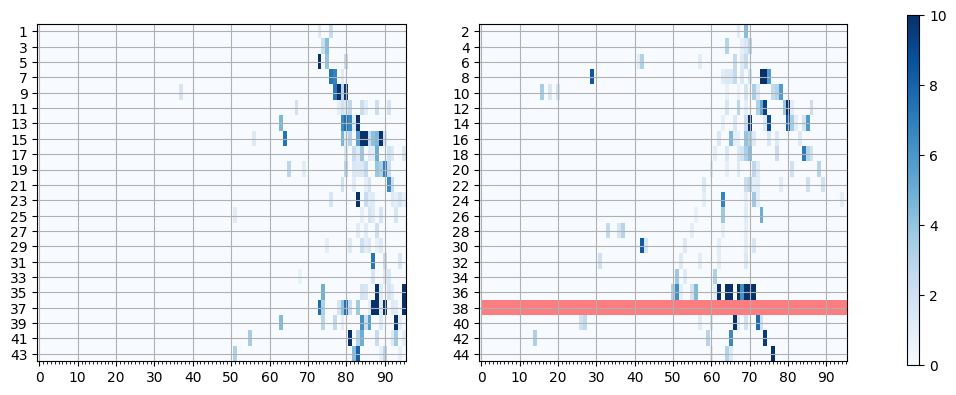

In [14]:
# Изображение проекции калориметра
calo_events[7].plot()

In [49]:
jopa = np.array(data['phi_0'])
jopa[0][7]

4.30136

In [16]:
# Данные проекций калориметра
calo_events[7].x_projection(), calo_events[7].y_projection()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., 14.19299984,
          0.86799997,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  3.65400004,
          0.        ,  0.884     ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.81699997,  0.        ]]))

In [22]:
x_proj = calo_events[7].x_projection()
y_proj = calo_events[7].y_projection()

In [ ]:
def plot_projections(x_proj, y_proj):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    im1 = axs[0].imshow(x_proj, cmap='viridis', aspect='auto')
    axs[0].set_title('X Projection')
    axs[0].set_xlabel('Y-axis')
    axs[0].set_ylabel('Z-axis')
    fig.colorbar(im1, ax=axs[0])

    im2 = axs[1].imshow(y_proj, cmap='viridis', aspect='auto')
    axs[1].set_title('Y Projection')
    axs[1].set_xlabel('X-axis')
    axs[1].set_ylabel('Z-axis')
    fig.colorbar(im2, ax=axs[1])

    plt.show()

plot_projections(x_proj, y_proj)

In [18]:
x_proj = calo_events[7].x_projection()
y_proj = calo_events[7].y_projection()

shape_x_proj = x_proj.shape
shape_x_proj

(22, 96)

Найдено 1166 адекватных прямых
Line 0: [(0, 14, 20), (0, 14, 21), (0, 14, 22), (0, 14, 23), (0, 14, 24), (0, 14, 25), (0, 14, 26), (0, 14, 27), (0, 14, 28), (0, 14, 29), (0, 14, 30), (0, 14, 31), (0, 14, 32), (0, 14, 33), (0, 14, 34), (0, 14, 35), (0, 14, 36), (0, 14, 37), (0, 14, 38), (0, 14, 39), (0, 14, 40), (0, 14, 41), (0, 14, 42), (0, 14, 43), (0, 14, 44), (0, 14, 45), (0, 14, 46), (0, 14, 47), (0, 14, 48), (0, 14, 49), (0, 14, 50), (0, 14, 51), (0, 14, 52), (0, 14, 53), (0, 14, 54), (0, 14, 55), (0, 14, 56), (0, 14, 57), (0, 14, 58), (0, 14, 59), (0, 14, 60), (0, 14, 61), (0, 14, 62), (0, 14, 63), (0, 14, 64), (0, 14, 65), (0, 14, 66), (0, 14, 67), (0, 14, 68), (0, 14, 69), (0, 14, 70), (0, 14, 71), (0, 14, 72), (0, 14, 73), (0, 14, 74), (0, 14, 75), (0, 14, 76)]
Line 1: [(1, 14, 20), (1, 14, 21), (1, 14, 22), (1, 14, 23), (1, 14, 24), (1, 14, 25), (1, 14, 26), (1, 14, 27), (1, 14, 28), (1, 14, 29), (1, 14, 30), (1, 14, 31), (1, 14, 32), (1, 14, 33), (1, 14, 34), (1, 14, 35), (1

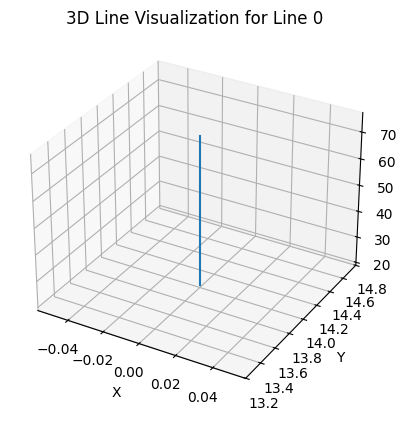

In [48]:
def bresenham_3d(x0, y0, z0, x1, y1, z1):
    points = [(x0, y0, z0)]
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    dz = abs(z1 - z0)
    xs = 1 if x1 > x0 else -1
    ys = 1 if y1 > y0 else -1
    zs = 1 if z1 > z0 else -1
    
    # Ведущая ось — ось X
    if dx >= dy and dx >= dz:
        p1 = 2 * dy - dx
        p2 = 2 * dz - dx
        while x0 != x1:
            x0 += xs
            if p1 >= 0:
                y0 += ys
                p1 -= 2 * dx
            if p2 >= 0:
                z0 += zs
                p2 -= 2 * dx
            p1 += 2 * dy
            p2 += 2 * dz
            points.append((x0, y0, z0))

    # Ведущая ось — ось Y
    elif dy >= dx and dy >= dz:
        p1 = 2 * dx - dy
        p2 = 2 * dz - dy
        while y0 != y1:
            y0 += ys
            if p1 >= 0:
                x0 += xs
                p1 -= 2 * dy
            if p2 >= 0:
                z0 += zs
                p2 -= 2 * dy
            p1 += 2 * dx
            p2 += 2 * dz
            points.append((x0, y0, z0))

    # Ведущая ось — ось Z
    else:
        p1 = 2 * dy - dz
        p2 = 2 * dx - dz
        while z0 != z1:
            z0 += zs
            if p1 >= 0:
                y0 += ys
                p1 -= 2 * dz
            if p2 >= 0:
                x0 += xs
                p2 -= 2 * dz
            p1 += 2 * dy
            p2 += 2 * dx
            points.append((x0, y0, z0))
    
    return points

def generate_3d_lines_from_projections(x_proj, y_proj, epsilon=1.0):
    lines = []
    sizeX, sizeY = x_proj.shape
    sizeY2, sizeZ = y_proj.shape

    # Проверка на соответствие размерностей
    if sizeX != sizeY2:
        raise ValueError("Размерности проекций не совпадают по оси X")

    for y in range(sizeY):
        z_coords_x = np.where(x_proj[:, y] > epsilon)[0]
        if len(z_coords_x) > 0:
            z1_x, z2_x = z_coords_x[0], z_coords_x[-1]
            
            for x in range(sizeX):
                z_coords_y = np.where(y_proj[x, :] > epsilon)[0]
                if len(z_coords_y) > 0:
                    z1_y, z2_y = z_coords_y[0], z_coords_y[-1]
                    
                    # Строим линию от (x0, y0, z0) до (x1, y1, z1)
                    line_points = bresenham_3d(x, y, z1_x, x, y, z2_y)
                    lines.append(line_points)

    return lines

lines = generate_3d_lines_from_projections(x_proj, y_proj, epsilon=0.5)

print(f"Найдено {len(lines)} адекватных прямых")
for i, line in enumerate(lines[:5]):  
    print(f"Line {i}: {line}")


if lines:
    line_index = 7
    line_to_plot = np.array(lines[line_index])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Построение конкретной линии
    ax.plot(line_to_plot[:, 0], line_to_plot[:, 1], line_to_plot[:, 2])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D Line Visualization for Line {line_index}')

    plt.show()
else:
    print("Нет адекватных прямых для отображения.")

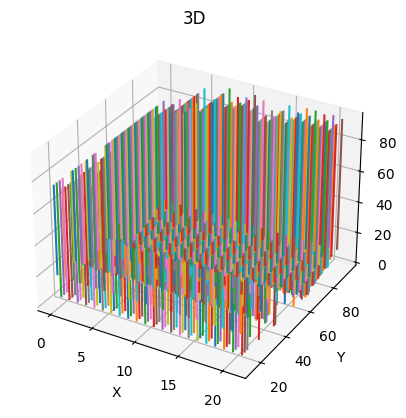

In [50]:
lines = [np.array(line) for line in lines]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for line in lines:
    ax.plot(line[:, 0], line[:, 1], line[:, 2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D')

plt.show()

In [ ]:
# дописать проверку и построение на эпсилон окрестность 
